# Logistics Analysis

In [1]:
import pandas as pd
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from datetime import datetime

# Extract the ZIP file
zip_path = "Delhivery Logistics.zip"
with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall()

# Load the CSV file into a DataFrame
df = pd.read_csv("delhivery.csv")

# Display the first few rows
print("Dataset loaded successfully!")
print(df.head())

Dataset loaded successfully!
       data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-1537410936476


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64

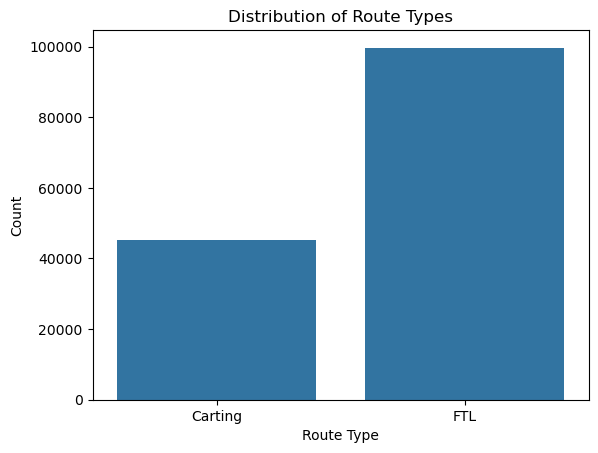

In [2]:
# Initial Dataset Exploration

# Display dataset information
print("\nDataset Information:")
print(df.info())

# Check for missing values
print("\nMissing Values Summary:")
print(df.isnull().sum())

# Basic statistics for numeric columns
print("\nDataset Description:")
print(df.describe())

# Check unique values in important columns
print("\nUnique Route Types:")
print(df['route_type'].unique())

# Visualization of route types
sns.countplot(data=df, x='route_type')
plt.title("Distribution of Route Types")
plt.xlabel("Route Type")
plt.ylabel("Count")
plt.show()


In [3]:
# Data Cleaning

# Fill missing values for categorical columns with 'Unknown'
categorical_columns = ['source_name', 'destination_name']
for col in categorical_columns:
    df[col].fillna('Unknown', inplace=True)

# Drop rows with missing values in critical columns
critical_columns = ['actual_distance_to_destination', 'actual_time']
df = df.dropna(subset=critical_columns)

print("\nData Cleaning Completed!")
print(df.info())



Data Cleaning Completed!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144867 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144867 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  flo

C:\Users\milto\AppData\Local\Temp\ipykernel_17680\899053269.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna('Unknown', inplace=True)


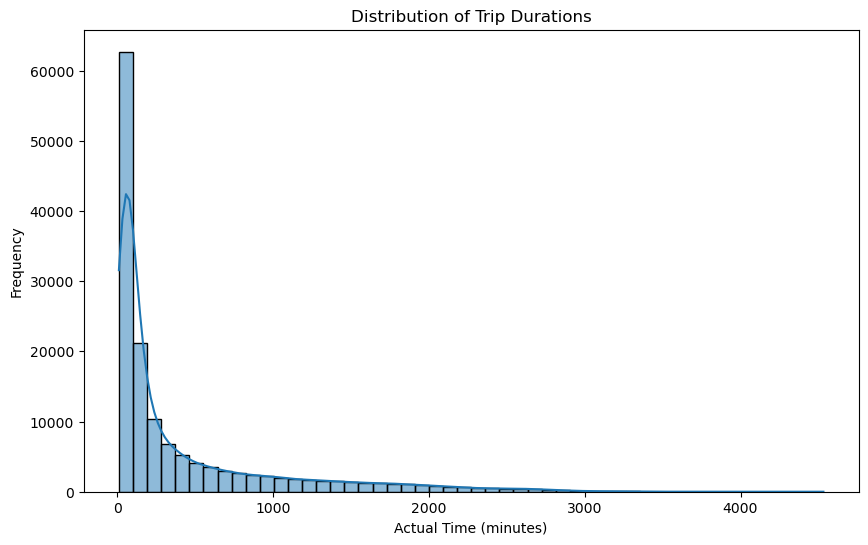

In [4]:
# Data Analysis and Visualization

# Distribution of Trip Durations
plt.figure(figsize=(10, 6))
sns.histplot(df['actual_time'], bins=50, kde=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Actual Time (minutes)')
plt.ylabel('Frequency')
plt.show()

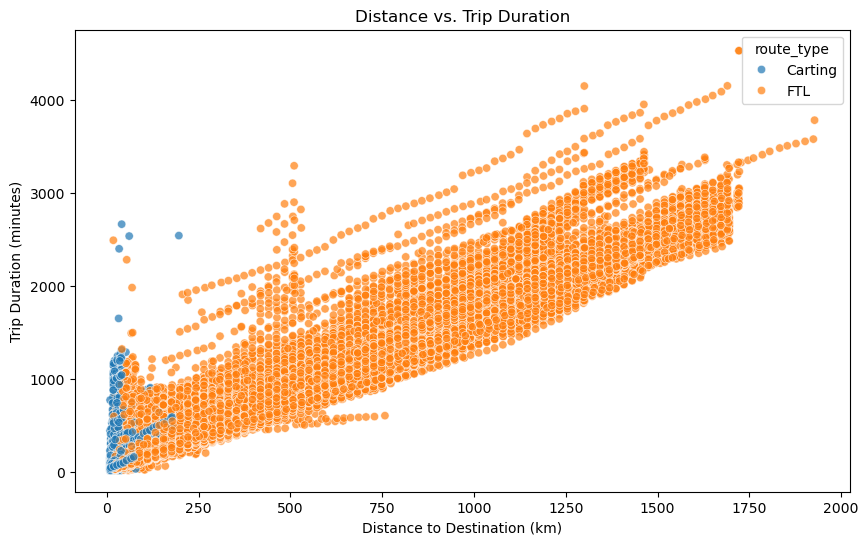

In [5]:
# Relationship Between Distance and Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='actual_distance_to_destination', y='actual_time', hue='route_type', alpha=0.7)
plt.title('Distance vs. Trip Duration')
plt.xlabel('Distance to Destination (km)')
plt.ylabel('Trip Duration (minutes)')
plt.show()

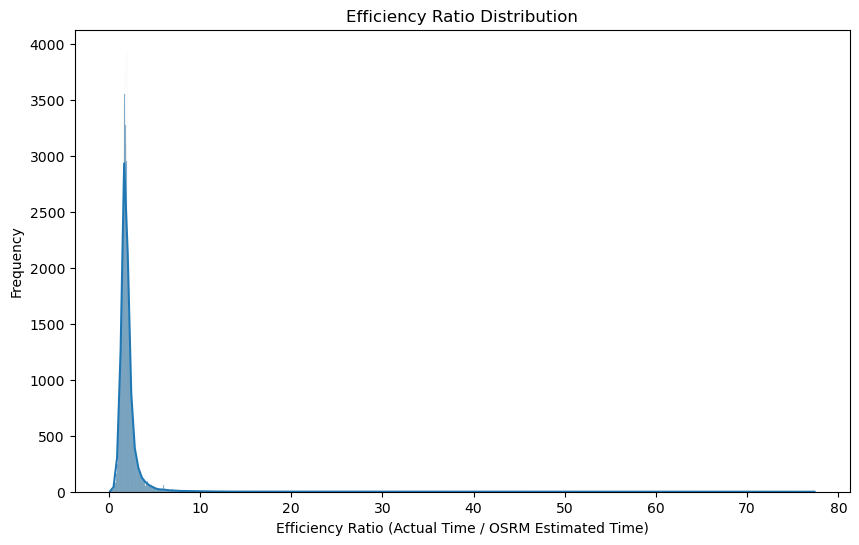


Top Inefficient Routes:
        data          trip_creation_time  \
6   training  2018-09-20 02:35:36.476840   
7   training  2018-09-20 02:35:36.476840   
9   training  2018-09-20 02:35:36.476840   
15  training  2018-09-14 15:42:46.437249   
16  training  2018-09-14 15:42:46.437249   

                                  route_schedule_uuid route_type  \
6   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
7   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
9   thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
15  thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...    Carting   
16  thanos::sroute:a16bfa03-3462-4bce-9c82-5784c7d...    Carting   

                  trip_uuid source_center                    source_name  \
6   trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
7   trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat)   
9   trip-153741093647649320  IND388620AAB  Khambhat_MotvdDPP_D (Gujarat) 

In [6]:
# Efficiency Analysis

# Calculate efficiency ratio
df['efficiency_ratio'] = df['actual_time'] / df['osrm_time']

plt.figure(figsize=(10, 6))
sns.histplot(df['efficiency_ratio'], kde=True)
plt.title('Efficiency Ratio Distribution')
plt.xlabel('Efficiency Ratio (Actual Time / OSRM Estimated Time)')
plt.ylabel('Frequency')
plt.show()

# Identify inefficient routes
inefficiency_threshold = 2
inefficient_routes = df[df['efficiency_ratio'] > inefficiency_threshold]
print("\nTop Inefficient Routes:")
print(inefficient_routes.head())


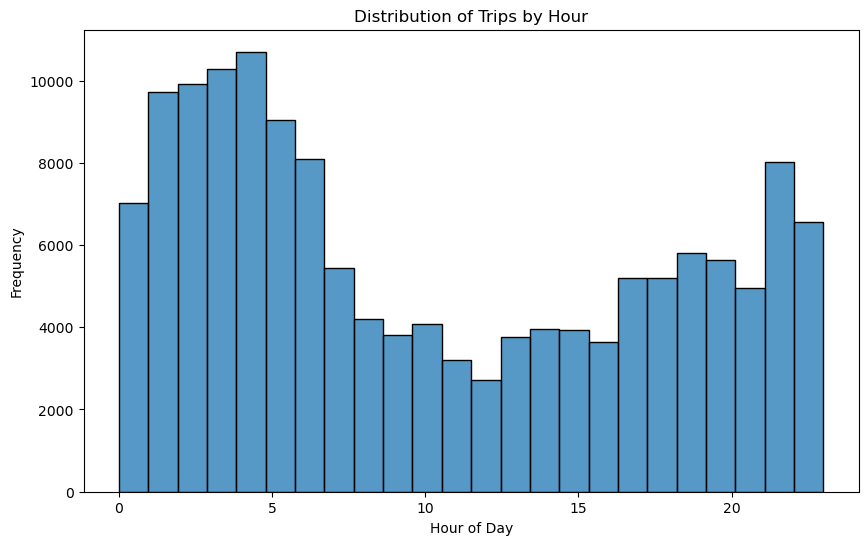

In [7]:
# Insights for Logistics Optimization

# Peak Hour Analysis

df['start_time'] = pd.to_datetime(df['od_start_time'])
df['hour'] = df['start_time'].dt.hour

plt.figure(figsize=(10, 6))
sns.histplot(df['hour'], bins=24, kde=False)
plt.title('Distribution of Trips by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.show()

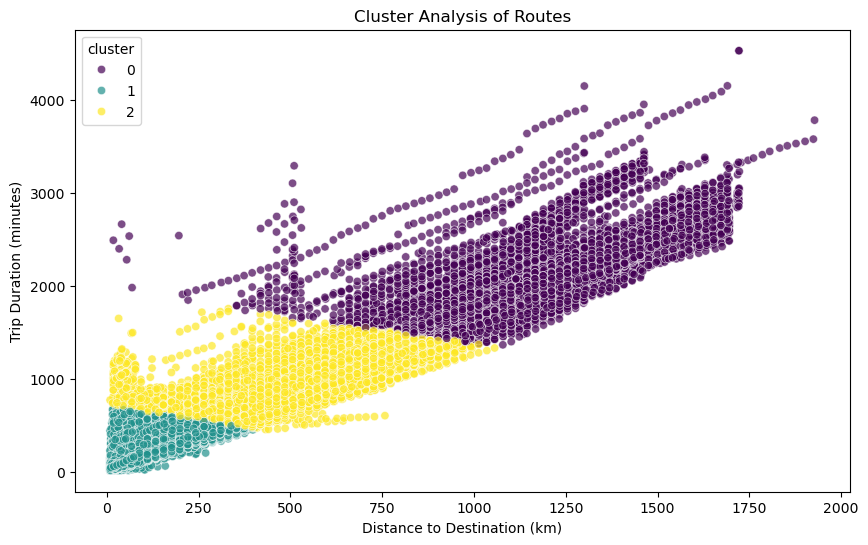

In [8]:
# Clustering for Route Optimization

# Use distance and time features for clustering
cluster_data = df[['actual_distance_to_destination', 'actual_time']].dropna()

kmeans = KMeans(n_clusters=3, random_state=0)
df['cluster'] = kmeans.fit_predict(cluster_data)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cluster_data, x='actual_distance_to_destination', y='actual_time', hue=df['cluster'], palette='viridis', alpha=0.7)
plt.title('Cluster Analysis of Routes')
plt.xlabel('Distance to Destination (km)')
plt.ylabel('Trip Duration (minutes)')
plt.show()
